In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

from utils import *

In [3]:
PATH = "data/dogscats/"

In [4]:
sz=224

In [5]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [6]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 75%|███████▌  | 271/360 [00:04<00:01, 62.83it/s, loss=0.478]


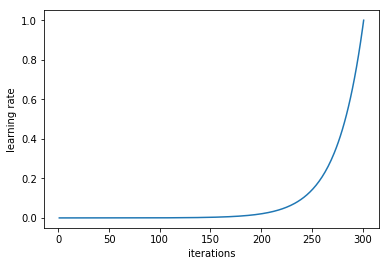

In [7]:
learn.sched.plot_lr()

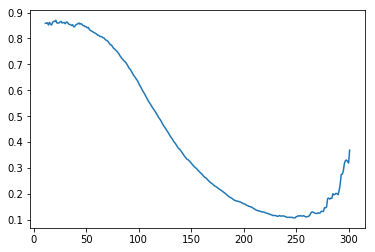

In [8]:
learn.sched.plot_loss()

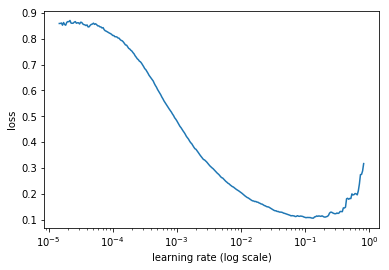

In [9]:
learn.sched.plot()

In [10]:
learn.fit(0.01, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.054369   0.025459   0.992188  
    1      0.043438   0.024268   0.989746                     
    2      0.03742    0.025114   0.989746                     



[0.02511425, 0.98974609375]

##  Data augmentation

In [11]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [12]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, 64, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [13]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.048604   0.027382   0.992188  



[0.027381709, 0.9921875]

####  We are still using precomupted activations, so this is fast

In [14]:
learn.precompute = False

In [15]:
learn.fit(1e-3, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.046471   0.024552   0.990723  



[0.024552315, 0.99072265625]

In [16]:
learn.fit(1e-4, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.048143   0.024069   0.991699  



[0.024069378, 0.99169921875]

#### Not using precomputed activations anymore, but all layer groups to the last are frozen (requires_grad = False), still relatively fast

In [17]:
# unfreezing all layer groups
learn.unfreeze()

In [18]:
learn.fit(1e-4, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.077029   0.031657   0.989258  



[0.031657424, 0.9892578125]

Chances are we should be using discriminative lrs - the LR for the conv block might have been too high.

## Cosine Annealing

In [20]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

In [23]:
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.047459   0.027172   0.989746  
    1      0.037667   0.024365   0.991699                     
    2      0.030256   0.023511   0.991211                     



[0.023510687, 0.9912109375]

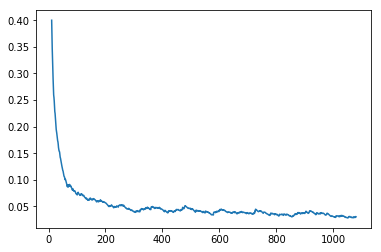

In [27]:
learn.sched.plot_loss()

In [30]:
learn.fit(1e-2, 4, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.027618   0.025914   0.990723  
    1      0.029832   0.027112   0.990723                     
    2      0.024648   0.025087   0.990723                     
    3      0.029059   0.025496   0.990723                     



[0.025495738, 0.99072265625]

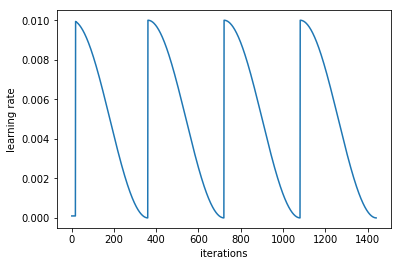

In [31]:
learn.sched.plot_lr()

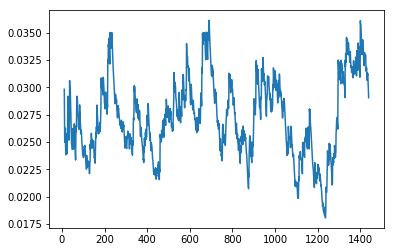

In [32]:
learn.sched.plot_loss()

In [33]:
learn.fit(1e-2, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.028268   0.026677   0.990723  
    1      0.021834   0.025491   0.990234                     
    2      0.027635   0.026712   0.990723                     
    3      0.019866   0.026336   0.990723                     
    4      0.023762   0.025478   0.991699                     
    5      0.024442   0.025307   0.991211                     
    6      0.022449   0.025015   0.990723                     
    7      0.025785   0.025914   0.991699                     
    8      0.019472   0.02511    0.991211                     
    9      0.024872   0.02403    0.991699                     
    10     0.01685    0.02412    0.992188                     
    11     0.017514   0.02577    0.991211                     
    12     0.017962   0.02484    0.990234                     
    13     0.016069   0.025626   0.991211                     
    14     0.013333   0.024564   0.990234                     



[0.02456382, 0.990234375]

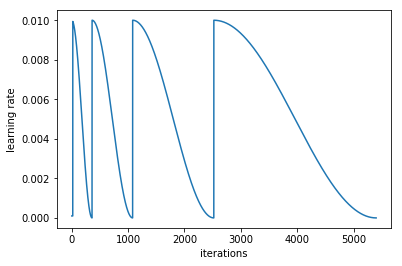

In [34]:
learn.sched.plot_lr()

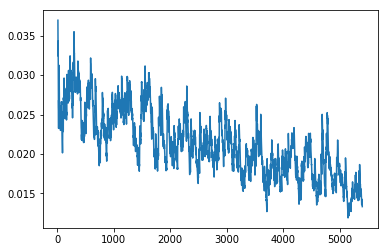

In [35]:
learn.sched.plot_loss()

In [36]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, 64 * 3, tfms)

In [38]:
learn.set_data(data)

In [39]:
learn.fit(1e-2, 1, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.015385   0.027461   0.990723  



[0.02746148, 0.99072265625]

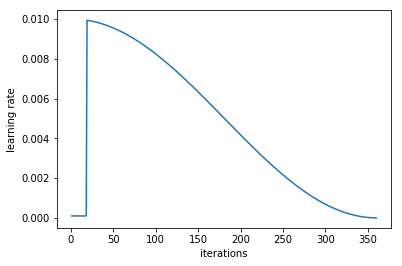

In [40]:
learn.sched.plot_lr()

In [41]:
learn.fit(1e-2, 1, cycle_len=3, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.016644   0.024674   0.990723  
    1      0.013853   0.025715   0.990723                     
    2      0.019337   0.026089   0.990723                     



[0.026088774, 0.99072265625]

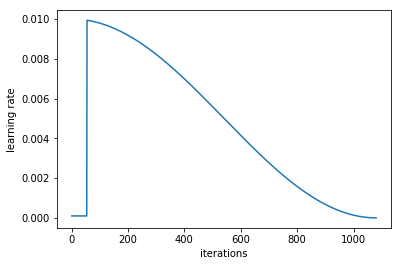

In [42]:
learn.sched.plot_lr()

In [43]:
learn.precompute = False

In [44]:
learn.fit(1e-2, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.029908   0.024597   0.991004  
    1      0.027267   0.02566    0.989867                     
    2      0.024174   0.026678   0.989867                     



[0.026678441, 0.9898674271323464]

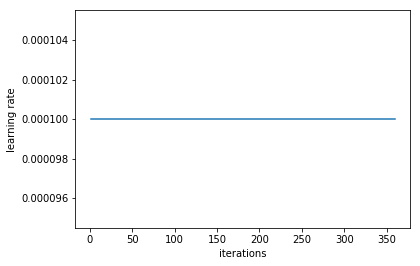

In [45]:
learn.sched.plot_lr()

In [48]:
learn.fit(5e-3, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.025653   0.025398   0.990341  
    1      0.024542   0.025377   0.989867                     
    2      0.026421   0.024982   0.990341                     
    3      0.02423    0.024403   0.991004                     
    4      0.023338   0.024127   0.991477                     
    5      0.02418    0.024436   0.989867                     
    6      0.024382   0.024145   0.991477                     



[0.024144815, 0.9914772781458768]

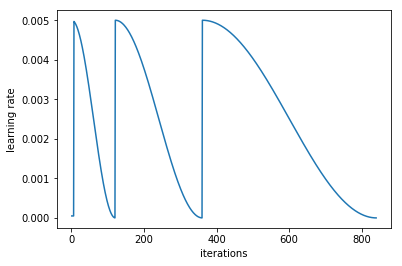

In [51]:
learn.sched.plot_lr()

## Fine-tuning and differential learning rate annealing

In [52]:
learn.unfreeze()

In [53]:
lr=np.array([1e-4,1e-3,1e-2])

In [54]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.045801   0.023033   0.989746  
    1      0.039859   0.019768   0.993164                     
    2      0.029731   0.020596   0.992188                     
    3      0.027062   0.021063   0.991211                     
    4      0.02022    0.019656   0.993652                     
    5      0.019856   0.020724   0.994141                     
    6      0.015741   0.020706   0.994629                     



[0.02070612, 0.99462890625]

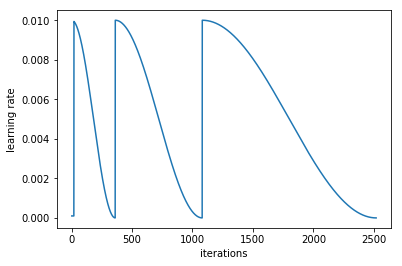

In [55]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the final layers. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested

In [56]:
learn.save('224_all')
learn.load('224_all')

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's TTA() method.

In [81]:
# With TTA
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)

accuracy(torch.from_numpy(preds), torch.from_numpy(y))

0.995

In [82]:
# Without TTA
log_preds = learn.predict()
#preds = np.exp(log_preds)

accuracy(torch.from_numpy(log_preds), torch.from_numpy(data.val_y))

0.9945